In [2]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
data = {'x':[13,19,16,14,15,14],
       'y':[40,83,62,48,58,43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


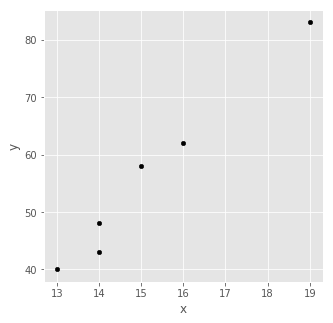

In [8]:
data.plot(kind='scatter',x='x', y='y', figsize=(5,5), color = 'black')

In [10]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['x']), y = data['y'])
prediction = linear_regression.predict(X = pd.DataFrame(data['x']))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -55.481751824817515
b value =  [7.32846715]


In [12]:
residulas = data['y'] - prediction
residulas.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [13]:
SSE = (residulas**2).sum()
SST = ((data['y'] - data['y'].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R^2 = ', R_squared)

R^2 =  0.9753156179610034


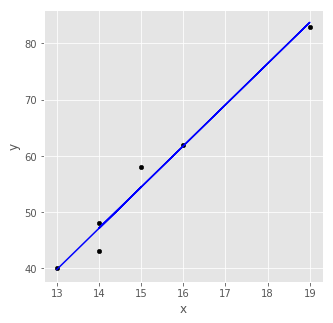

In [14]:
data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color = 'black')
plt.plot(data['x'], prediction, color = 'blue')

In [15]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X = pd.DataFrame(data['x']), y = data['y']))
print('MSE = ', mean_squared_error(prediction, data['y']))
print('RMSE = ', mean_squared_error(prediction, data['y'])**.5)

score =  0.9753156179610034
MSE =  5.172749391727503
RMSE =  2.2743679103714736


In [18]:
from sklearn import datasets
boston_house_price = datasets.load_boston()
print(boston_house_price.keys())
print(boston_house_price.data.shape)
print(boston_house_price.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
print(boston_house_price.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [22]:
data_frame = pd.DataFrame(boston_house_price.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [23]:
data_frame.columns = boston_house_price.feature_names
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [24]:
data_frame['price'] = boston_house_price.target
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


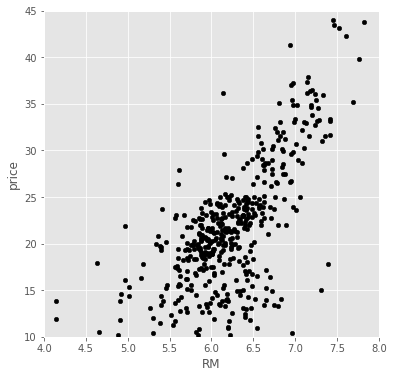

In [25]:
data_frame.plot(kind='scatter', x = 'RM', y = 'price', figsize=(6,6), color='black',xlim = (4,8), ylim=  (10,45))

In [27]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data_frame['RM']), y = data_frame['price'])
prediction = linear_regression.predict(X = pd.DataFrame(data_frame['RM']))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -34.67062077643857
b value =  [9.10210898]


In [28]:
residulas = data_frame['price'] - prediction
residulas.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: price, dtype: float64

In [29]:
SSE = (residulas**2).sum()
SST = ((data_frame['price'] - data_frame['price'].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R^2 = ', R_squared)

R^2 =  0.4835254559913341


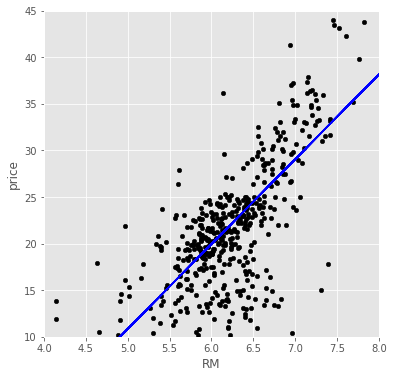

In [32]:
data_frame.plot(kind='scatter', x = 'RM', y = 'price', figsize=(6,6), color='black',xlim = (4,8), ylim=  (10,45))
plt.plot(data_frame['RM'], prediction, color='blue')

In [33]:
print('score = ', linear_regression.score(X = pd.DataFrame(data_frame['RM']), y = data_frame['price']))
print('MSE = ', mean_squared_error(prediction, data_frame['price']))
print('RMSE = ', mean_squared_error(prediction, data_frame['price'])**.5)

score =  0.4835254559913343
MSE =  43.60055177116956
RMSE =  6.603071389222561
